# Elements of Convex Optimization 2024 - Homework 2

### Solution author: <Kuba Czech, 156035>


The purpose of this notebook is to play with Taylor's series.

This exercise requires **numpy**, **matplotlib** and **[autograd](https://github.com/HIPS/autograd)** libraries:

In [15]:
#!pip install numpy matplotlib autograd

In [1]:
# This line makes the graphs show up in the notebook, so you can safely ignore it (but run it!).
%matplotlib inline

In [2]:
print("Hello world!")

Hello world!


# A reminder of what the Taylor series around point $x_0$ looks like:
$P_m(x,x_0) = \sum\limits_{i=0}^{m}\frac{f^{(i)}(x_0)}{i!}(x-x_0)^i $

During implementation remember that factorial and $(x-x_0)^i$ both grow
exponentially fast so it's not a good idea to update them separately.

# Task 1

Find e (the math constant known as Euler's number) using your knowledge about all derivatives of e and it's value at some known point. Check the lecture about Taylor's series if you don't know what to do.

In [2]:
import numpy as np
import autograd.numpy as anp
import autograd

# e == e^1 so we use Taylor expansion and instead of x we plug 1 (1 to any power is 1 so there is no need to change numerator and we change only denominator)
def find_e(n):
    summ = 1 #step 0
    curr_step = 1
    #steps 1, 2, ..., n
    for i in range(n):
        curr_step /= i+1
        summ += curr_step
    return summ
    
print(find_e(20), np.e)

2.7182818284590455 2.718281828459045


# Task 2

Implement Taylor's expansion to a limited arbitrary degree and for an arbitrary function, and visualize some approximations.

In [3]:
import numpy as np
from matplotlib import pyplot as plt

# Handy function, which takes the original function and its approximation
# and plots it from <a> to <b> using <points_num> number of points.
def visualize(f, f_approx, a=-3, b=3, points_num=100,):
    x = np.linspace(a, b, points_num)
    f = f(x)
    f_approx = np.array([f_approx(xi) for xi in x])

    plt.plot(x, f,label="f(x)")
    plt.plot(x, f_approx, label="approximation")
    plt.legend()
    plt.show()

In [4]:
import autograd
def fake_taylor_expansion(x, x_0, func, n):
    summ = 0
    counter = 1
    for i in range(n+1):
        if (i==0):
            summ += func(x_0)
        else:
            counter *= (x-x_0)/i
            func = autograd.grad(func)
            summ += func(float(x_0)) * counter
    return summ

In [5]:
import autograd.numpy as anp

def my_func(x):
    return x**3-x**2+2*x-6

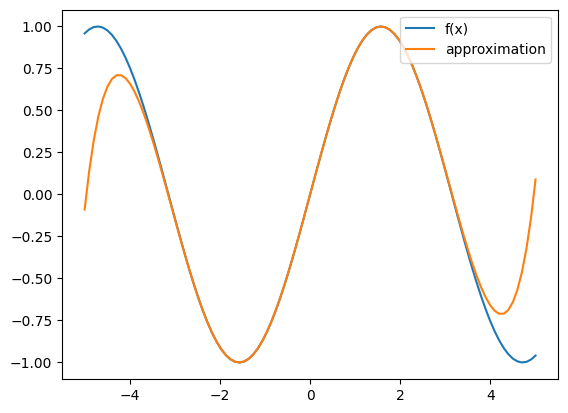

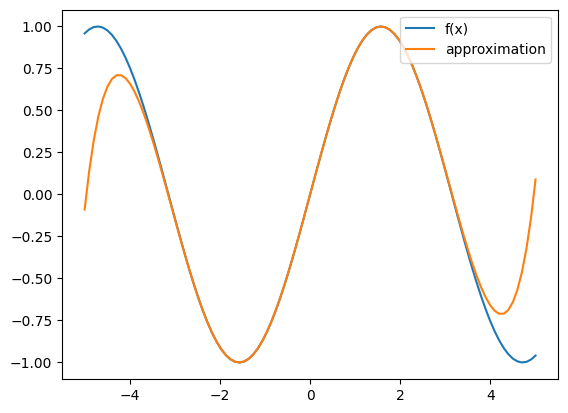

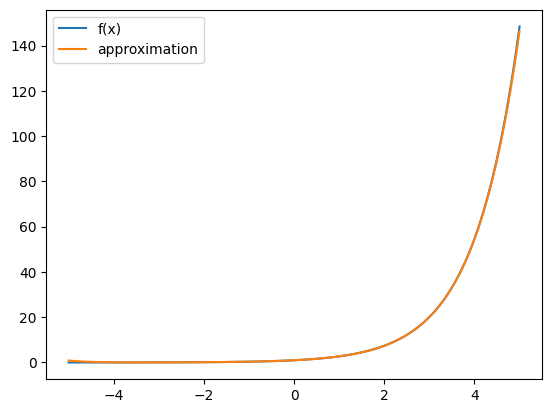

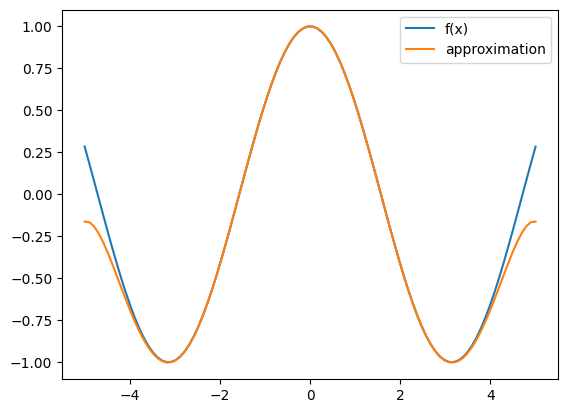

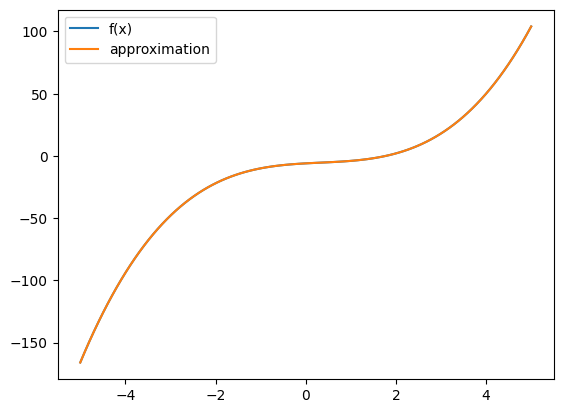

In [6]:
#func = anp.exp
func = anp.sin #from -4,4 perhaps?

degree = 10
a,b = -5, 5

my_approx_f = lambda x: fake_taylor_expansion(x, 0, func, n=degree)
visualize(f=func, f_approx=my_approx_f, a=a, b=b, points_num=100)

functions = [anp.sin, anp.exp, anp.cos, my_func]

for f in functions:
    my_approx_f = lambda x: fake_taylor_expansion(x, 0, f, n=degree)
    visualize(f=f, f_approx=my_approx_f, a=a, b=b, points_num=100)